<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/FinalSubmissionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [574]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns # for the correlation matrix plot
import pydot
import pydotplus
import io
import cv2
from google.colab import files

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (5).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [575]:
# Show dataset
# split data into training and test datasets
X = df[0:284]
y = df[285:570]
# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
X = X.drop(['ID'],axis=1)
y = y.drop(['ID'],axis=1)
from sklearn.model_selection import train_test_split
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2)


Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [576]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
276         B        11.33  ...          0.2758                  0.06386
85          M        18.46  ...          0.3695                  0.08579
195         B        12.91  ...          0.3024                  0.06949
111         B        12.63  ...          0.2226                  0.08486
125         B        13.85  ...          0.2364                  0.07182
..        ...          ...  ...             ...                      ...
74          B        12.31  ...          0.2618                  0.07609
243         B        13.75  ...          0.2663                  0.06321
281         B        11.74  ...          0.3101                  0.06688
87          M        19.02  ...          0.3956                  0.09288
239         M        17.46  ...          0.2853                  0.08496

[227 rows x 31 columns]
y_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
561     

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [577]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (57, 31)
y_test set shape:  (57, 31)
X_train shape:  (227, 31)
y_train shape:  (227, 31)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [578]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
X_train['Diagnosis'] = X_train['Diagnosis'].replace({'M':1,'B':0})
y_train['Diagnosis'] = y_train['Diagnosis'].replace({'M':1,'B':0})
X_test['Diagnosis'] = X_test['Diagnosis'].replace({'M':1,'B':0})
y_test['Diagnosis'] = y_test['Diagnosis'].replace({'M':1,'B':0})

# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'


## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [579]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Diagnosis                    0.500516
Mean_Radius                  3.693860
Mean_Texture                 4.375241
Mean_Perimeter              25.531335
Mean_Area                  371.809636
Mean_Smoothness              0.013437
Mean_Compactness             0.057568
Mean_Concavity               0.085932
Mean_Concave_Points          0.040904
Mean_Symmetry                0.030032
Mean_Fractal_Dimension       0.007692
Radius_SE                    0.304200
Texture_SE                   0.519014
Perimeter_SE                 2.279913
Area_SE                     49.308033
Smoothness_SE                0.003314
Compactness_SE               0.020608
Concavity_SE                 0.038261
Concave_Points_SE            0.006661
Symmetry_SE                  0.009709
Fractal_Dimension_SE         0.003147
Worst_Radius                 5.060100
Worst_Texture                6.518053
Worst_Perimeter             35.211249
Worst_Area                 596.508100
Wo

In [580]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  Diagnosis                    0.434605
Mean_Radius                  3.422894
Mean_Texture                 4.202106
Mean_Perimeter              23.607770
Mean_Area                  342.491466
Mean_Smoothness              0.014197
Mean_Compactness             0.048512
Mean_Concavity               0.075593
Mean_Concave_Points          0.037958
Mean_Symmetry                0.025373
Mean_Fractal_Dimension       0.006556
Radius_SE                    0.255869
Texture_SE                   0.543624
Perimeter_SE                 1.809993
Area_SE                     45.810652
Smoothness_SE                0.002775
Compactness_SE               0.015071
Concavity_SE                 0.021675
Concave_Points_SE            0.005747
Symmetry_SE                  0.007405
Fractal_Dimension_SE         0.001980
Worst_Radius                 4.587896
Worst_Texture                5.784180
Worst_Perimeter             31.856456
Worst_Area                 548.044371
Wo

In [581]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Diagnosis                    0.502500
Mean_Radius                  3.261990
Mean_Texture                 4.103304
Mean_Perimeter              22.217897
Mean_Area                  315.185240
Mean_Smoothness              0.014374
Mean_Compactness             0.052937
Mean_Concavity               0.070943
Mean_Concave_Points          0.032694
Mean_Symmetry                0.023082
Mean_Fractal_Dimension       0.006565
Radius_SE                    0.230039
Texture_SE                   0.648405
Perimeter_SE                 1.742665
Area_SE                     31.461875
Smoothness_SE                0.002520
Compactness_SE               0.015286
Concavity_SE                 0.023598
Concave_Points_SE            0.005362
Symmetry_SE                  0.006893
Fractal_Dimension_SE         0.001988
Worst_Radius                 4.635310
Worst_Texture                5.817100
Worst_Perimeter             32.042515
Worst_Area                 522.268897
Wor

In [582]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  Diagnosis                    0.383723
Mean_Radius                  3.320841
Mean_Texture                 4.639938
Mean_Perimeter              22.703245
Mean_Area                  329.491270
Mean_Smoothness              0.013079
Mean_Compactness             0.039567
Mean_Concavity               0.063979
Mean_Concave_Points          0.032793
Mean_Symmetry                0.022830
Mean_Fractal_Dimension       0.006464
Radius_SE                    0.269392
Texture_SE                   0.620153
Perimeter_SE                 1.859349
Area_SE                     37.968669
Smoothness_SE                0.003031
Compactness_SE               0.017998
Concavity_SE                 0.026499
Concave_Points_SE            0.006164
Symmetry_SE                  0.006080
Fractal_Dimension_SE         0.003259
Worst_Radius                 4.609279
Worst_Texture                6.255411
Worst_Perimeter             32.404551
Worst_Area                 547.329279
Wor

## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [583]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.688448,0.507532,0.700467,0.645419,0.328203,0.584460,0.619673,0.720314,0.289798,-0.010195,0.481122,-0.030326,0.479272,0.479769,-0.130832,0.263348,0.141755,0.325046,-0.043898,0.026132,0.744586,0.530601,0.753301,0.686957,0.410309,0.580728,0.601378,0.782175,0.400727,0.323150
Mean_Radius,0.688448,1.000000,0.419910,0.997690,0.986860,0.129053,0.510089,0.647850,0.812628,0.136184,-0.304958,0.678631,-0.022974,0.679792,0.748533,-0.183897,0.203574,0.117392,0.306787,-0.053450,-0.061787,0.959155,0.351806,0.957013,0.935099,0.053781,0.376694,0.460196,0.707911,0.102350,-0.024888
Mean_Texture,0.507532,0.419910,1.000000,0.422650,0.401859,0.027488,0.283623,0.319770,0.345600,0.023060,-0.070908,0.230413,0.263587,0.234522,0.239571,-0.103199,0.158546,0.078363,0.126492,-0.110064,0.009281,0.461290,0.906618,0.457957,0.444189,0.170319,0.342537,0.340293,0.382257,0.120664,0.187486
Mean_Perimeter,0.700467,0.997690,0.422650,1.000000,0.985481,0.170955,0.562277,0.687603,0.842410,0.174802,-0.252211,0.689143,-0.007293,0.697056,0.755724,-0.164501,0.249030,0.146706,0.335484,-0.023097,-0.025947,0.957998,0.355675,0.961559,0.933650,0.087236,0.419149,0.495942,0.735109,0.132852,0.018108
Mean_Area,0.645419,0.986860,0.401859,0.985481,1.000000,0.137462,0.494723,0.654238,0.805707,0.124426,-0.277113,0.723083,0.010647,0.722971,0.803554,-0.125298,0.208930,0.139204,0.299154,-0.018230,-0.034227,0.942496,0.328715,0.940215,0.941188,0.053523,0.341955,0.439923,0.672375,0.069792,-0.035214
Mean_Smoothness,0.328203,0.129053,0.027488,0.170955,0.137462,1.000000,0.653726,0.551770,0.567046,0.585044,0.593452,0.304956,0.174684,0.297686,0.251432,0.330814,0.372822,0.229930,0.313058,0.290595,0.300294,0.163166,0.055869,0.195257,0.154775,0.730456,0.457986,0.410912,0.469739,0.393011,0.462734
Mean_Compactness,0.584460,0.510089,0.283623,0.562277,0.494723,0.653726,1.000000,0.874921,0.838295,0.621650,0.564886,0.474836,0.121442,0.522455,0.446923,0.100653,0.739193,0.467091,0.561465,0.325572,0.466496,0.535759,0.281207,0.591962,0.503857,0.527668,0.860168,0.785840,0.814407,0.551960,0.660291
Mean_Concavity,0.619673,0.647850,0.319770,0.687603,0.654238,0.551770,0.874921,1.000000,0.905677,0.521761,0.381388,0.610955,0.163899,0.620973,0.600704,0.126094,0.682084,0.655760,0.636057,0.269080,0.465599,0.648891,0.295912,0.688920,0.632813,0.431203,0.714826,0.852587,0.830623,0.413724,0.492721
Mean_Concave_Points,0.720314,0.812628,0.345600,0.842410,0.805707,0.567046,0.838295,0.905677,1.000000,0.480305,0.182283,0.677843,0.090493,0.687121,0.683092,0.034322,0.488251,0.347748,0.537013,0.158572,0.237891,0.809935,0.308563,0.837867,0.784059,0.412355,0.634958,0.691137,0.886823,0.352679,0.332293
Mean_Symmetry,0.289798,0.136184,0.023060,0.174802,0.124426,0.585044,0.621650,0.521761,0.480305,1.000000,0.510070,0.270060,0.163334,0.278018,0.195878,0.080876,0.426959,0.316574,0.359291,0.499769,0.346765,0.169536,0.053411,0.209257,0.146835,0.397931,0.479834,0.441130,0.455018,0.699216,0.443897


In [584]:
y_train.corr(method='pearson')


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.773635,0.385482,0.786245,0.769144,0.346008,0.603692,0.789479,0.831022,0.304182,-0.022877,0.624123,0.045041,0.612502,0.569922,-0.061034,0.323358,0.447831,0.495994,-0.006608,0.140592,0.796510,0.419204,0.804929,0.762411,0.365391,0.560211,0.703308,0.803438,0.315273,0.267910
Mean_Radius,0.773635,1.000000,0.250644,0.998251,0.986454,0.230745,0.525284,0.740074,0.853971,0.146513,-0.294926,0.699019,-0.129819,0.689986,0.720040,-0.292080,0.212016,0.342887,0.447163,-0.190559,-0.041369,0.983381,0.238315,0.977746,0.947963,0.148351,0.424209,0.585646,0.778856,0.144182,0.010135
Mean_Texture,0.385482,0.250644,1.000000,0.259993,0.266729,-0.020726,0.207653,0.313318,0.278696,0.114196,-0.068025,0.343072,0.501809,0.351805,0.282878,0.081040,0.206277,0.216091,0.188731,0.182729,0.096610,0.275832,0.910496,0.290456,0.276504,0.003038,0.228709,0.285874,0.252503,0.114821,0.065893
Mean_Perimeter,0.786245,0.998251,0.259993,1.000000,0.986216,0.261878,0.570374,0.774764,0.877020,0.178040,-0.250950,0.707680,-0.125593,0.704900,0.726531,-0.273343,0.254077,0.382322,0.477657,-0.175601,-0.002838,0.982795,0.246481,0.982254,0.948394,0.177147,0.465040,0.621802,0.803796,0.167765,0.054199
Mean_Area,0.769144,0.986454,0.266729,0.986216,1.000000,0.229831,0.518301,0.749129,0.858098,0.166047,-0.268599,0.772204,-0.097506,0.761561,0.804054,-0.240382,0.215258,0.343557,0.443452,-0.162871,-0.018425,0.984120,0.248440,0.979539,0.978903,0.151554,0.405405,0.571543,0.763600,0.138011,0.012233
Mean_Smoothness,0.346008,0.230745,-0.020726,0.261878,0.229831,1.000000,0.684045,0.506124,0.539008,0.538530,0.591215,0.274699,0.038036,0.280461,0.217075,0.309004,0.293041,0.324441,0.463787,0.101087,0.334411,0.252172,0.029676,0.277331,0.240690,0.836150,0.460801,0.431091,0.516664,0.359461,0.505264
Mean_Compactness,0.603692,0.525284,0.207653,0.570374,0.518301,0.684045,1.000000,0.878979,0.811751,0.569462,0.556402,0.451377,-0.031476,0.517090,0.403065,0.132983,0.733189,0.737639,0.714676,0.089784,0.563622,0.534390,0.206382,0.593305,0.505300,0.602580,0.869493,0.836477,0.822779,0.447543,0.703268
Mean_Concavity,0.789479,0.740074,0.313318,0.774764,0.749129,0.506124,0.878979,1.000000,0.939237,0.463509,0.253117,0.639019,-0.007769,0.688982,0.611981,0.015081,0.640391,0.762130,0.708905,0.048583,0.410740,0.750242,0.309252,0.796251,0.734737,0.445898,0.784981,0.901189,0.898992,0.386809,0.501908
Mean_Concave_Points,0.831022,0.853971,0.278696,0.877020,0.858098,0.539008,0.811751,0.939237,1.000000,0.418457,0.132866,0.700581,-0.014149,0.719253,0.663528,-0.022370,0.477324,0.589643,0.679549,-0.009363,0.269443,0.859054,0.286443,0.883265,0.835103,0.445801,0.657504,0.780025,0.922578,0.341683,0.356318
Mean_Symmetry,0.304182,0.146513,0.114196,0.178040,0.166047,0.538530,0.569462,0.463509,0.418457,1.000000,0.467096,0.285491,0.112316,0.304885,0.203315,0.307740,0.429093,0.409576,0.437104,0.403908,0.345500,0.169668,0.108059,0.201946,0.177473,0.440731,0.430178,0.397251,0.384506,0.706198,0.398345


### Test set correlation values

In [585]:
X_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.792084,0.383383,0.806217,0.789312,0.244990,0.525865,0.640332,0.804276,0.331442,-0.059554,0.628100,-0.098162,0.588228,0.692765,0.045066,0.349728,0.292267,0.424529,-0.022113,0.155394,0.826991,0.415154,0.828683,0.803808,0.402360,0.614038,0.693518,0.787695,0.500151,0.391442
Mean_Radius,0.792084,1.000000,0.413491,0.996309,0.994333,-0.028494,0.375564,0.553560,0.740384,0.185493,-0.404402,0.695792,-0.131781,0.664606,0.795009,-0.056526,0.296035,0.295768,0.483343,-0.112555,0.088474,0.968974,0.409672,0.959248,0.946880,0.120910,0.408773,0.554992,0.728419,0.304144,0.067720
Mean_Texture,0.383383,0.413491,1.000000,0.426049,0.403569,-0.197176,0.299871,0.301970,0.307779,0.202201,-0.145051,0.377048,0.297654,0.392722,0.400163,-0.055649,0.364538,0.235991,0.223565,0.098975,0.128930,0.419765,0.926024,0.435579,0.410696,-0.116959,0.326444,0.281489,0.267340,0.170935,0.045252
Mean_Perimeter,0.806217,0.996309,0.426049,1.000000,0.989988,0.012662,0.449281,0.615868,0.787332,0.225355,-0.336947,0.729376,-0.118972,0.706464,0.820858,-0.025628,0.356241,0.351142,0.532935,-0.107681,0.144726,0.971756,0.421038,0.969748,0.948803,0.153791,0.464009,0.606744,0.765835,0.315554,0.120561
Mean_Area,0.789312,0.994333,0.403569,0.989988,1.000000,-0.042571,0.353378,0.541479,0.727554,0.173346,-0.406458,0.711584,-0.118292,0.679418,0.816090,-0.031237,0.283114,0.284507,0.467863,-0.102249,0.089744,0.967979,0.387285,0.958347,0.958512,0.112732,0.385971,0.540432,0.710797,0.275225,0.058603
Mean_Smoothness,0.244990,-0.028494,-0.197176,0.012662,-0.042571,1.000000,0.566389,0.409269,0.461202,0.474463,0.605435,0.169144,-0.160251,0.154521,0.115295,0.384546,0.286439,0.217945,0.367985,-0.037847,0.330482,0.068656,-0.079387,0.090652,0.051264,0.879343,0.520172,0.462178,0.461974,0.383462,0.653694
Mean_Compactness,0.525865,0.375564,0.299871,0.449281,0.353378,0.566389,1.000000,0.915243,0.836836,0.595899,0.614575,0.635082,0.058816,0.682435,0.576473,0.276050,0.815787,0.744922,0.761095,0.059781,0.690796,0.446247,0.319177,0.510170,0.412638,0.506333,0.846207,0.848572,0.759224,0.404978,0.705208
Mean_Concavity,0.640332,0.553560,0.301970,0.615868,0.541479,0.409269,0.915243,1.000000,0.906341,0.500676,0.449235,0.701534,0.056345,0.734751,0.678688,0.264636,0.771537,0.827700,0.801011,0.084419,0.683621,0.588863,0.300098,0.639363,0.562649,0.402250,0.751566,0.918722,0.812125,0.365941,0.595942
Mean_Concave_Points,0.804276,0.740384,0.307779,0.787332,0.727554,0.461202,0.836836,0.906341,1.000000,0.508194,0.226698,0.779968,-0.065730,0.789322,0.797166,0.214056,0.616490,0.605390,0.765932,0.012299,0.439209,0.783795,0.330130,0.821176,0.757948,0.500809,0.748684,0.873052,0.934853,0.460731,0.514498
Mean_Symmetry,0.331442,0.185493,0.202201,0.225355,0.173346,0.474463,0.595899,0.500676,0.508194,1.000000,0.342477,0.500118,0.099142,0.476584,0.411272,0.072295,0.399147,0.319252,0.378294,0.372567,0.235854,0.242506,0.234633,0.267093,0.218901,0.313963,0.471171,0.428810,0.408748,0.694225,0.346356


In [586]:
y_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.745769,0.238183,0.750894,0.761065,0.348928,0.519083,0.662360,0.744412,0.249852,-0.156225,0.636824,0.018941,0.652293,0.718043,0.024598,0.124322,0.192612,0.382417,-0.019564,-0.031177,0.791168,0.248321,0.790152,0.779139,0.341027,0.521163,0.594577,0.710893,0.361354,0.089367
Mean_Radius,0.745769,1.000000,0.120263,0.998714,0.986529,0.145848,0.494879,0.661729,0.817303,-0.002748,-0.422010,0.554740,-0.221661,0.568111,0.696721,-0.315336,0.075114,0.085372,0.307935,-0.132117,-0.096344,0.966741,0.115485,0.961646,0.929652,0.112910,0.557369,0.578302,0.791013,0.291519,-0.078992
Mean_Texture,0.238183,0.120263,1.000000,0.117462,0.112370,-0.164810,0.024518,0.175316,0.091450,-0.072775,-0.131218,0.149118,0.510687,0.153391,0.151720,0.224084,0.148832,0.235542,0.160546,-0.187115,0.058372,0.126433,0.942427,0.125651,0.114379,0.071351,0.060357,0.197595,0.089622,-0.176690,-0.037787
Mean_Perimeter,0.750894,0.998714,0.117462,1.000000,0.988849,0.171662,0.535352,0.692781,0.841263,0.018027,-0.383705,0.570515,-0.212120,0.586550,0.710497,-0.300031,0.111746,0.116035,0.335154,-0.114034,-0.064228,0.969341,0.112778,0.966701,0.936090,0.130644,0.588823,0.606266,0.811462,0.296961,-0.041746
Mean_Area,0.761065,0.986529,0.112370,0.988849,1.000000,0.198226,0.546876,0.710466,0.854103,0.036619,-0.352422,0.615582,-0.188851,0.634543,0.753794,-0.225822,0.115883,0.118245,0.333564,-0.075340,-0.075194,0.975787,0.102976,0.974344,0.965086,0.162090,0.591488,0.601371,0.801954,0.299799,-0.044594
Mean_Smoothness,0.348928,0.145848,-0.164810,0.171662,0.198226,1.000000,0.579650,0.390400,0.491205,0.405657,0.484538,0.333236,0.096778,0.325312,0.323075,0.419294,0.092149,0.087196,0.283574,0.283841,0.063186,0.215769,-0.106282,0.222940,0.255744,0.822588,0.326009,0.280809,0.430543,0.260119,0.343888
Mean_Compactness,0.519083,0.494879,0.024518,0.535352,0.546876,0.579650,1.000000,0.874762,0.833585,0.435277,0.517960,0.556556,0.011774,0.594784,0.592576,0.175104,0.695958,0.628992,0.667065,0.236850,0.518938,0.546402,0.011546,0.578866,0.585391,0.470865,0.853155,0.794953,0.786763,0.315392,0.666024
Mean_Concavity,0.662360,0.661729,0.175316,0.692781,0.710466,0.390400,0.874762,1.000000,0.918297,0.285103,0.238386,0.558968,0.080422,0.624981,0.646485,0.092786,0.596572,0.688784,0.693174,0.058308,0.367791,0.682284,0.172921,0.710110,0.716181,0.335960,0.795562,0.920619,0.847808,0.178165,0.444341
Mean_Concave_Points,0.744412,0.817303,0.091450,0.841263,0.854103,0.491205,0.833585,0.918297,1.000000,0.257259,0.051768,0.651141,-0.017086,0.684373,0.746470,-0.008886,0.386501,0.406745,0.593402,0.074255,0.189661,0.835233,0.091338,0.848576,0.852815,0.382974,0.736166,0.775237,0.918217,0.257633,0.267944
Mean_Symmetry,0.249852,-0.002748,-0.072775,0.018027,0.036619,0.405657,0.435277,0.285103,0.257259,1.000000,0.415690,0.175538,0.118617,0.207575,0.144356,0.355736,0.261884,0.253982,0.304807,0.253925,0.250812,0.040007,-0.121998,0.061024,0.071192,0.307044,0.306900,0.226914,0.214337,0.497329,0.425232


## Heatmap of correlation in our dataset
As you can see from the legend the lighter the square the more highly correlated the feature data and the darker the square the less correlated.

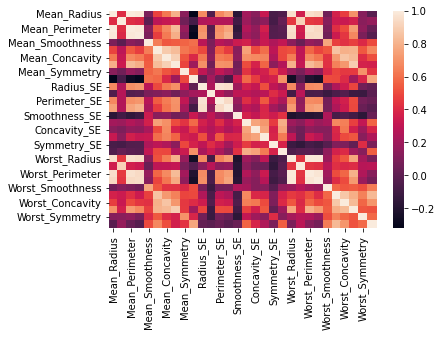

In [587]:
# it computes the Pearson’s correlation coefficient.
corr_matrix = X.corr()
#The parameter ‘ annot=True ‘ displays the values of the correlation coefficient
#in each cell
sns.heatmap(corr_matrix, annot = False)
plt.show()


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

# Creating linear regression model for Area Severity and Smoothness Severity
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the Mean_Radius has a negative impact on the Mean_Fractal_Dimension.  When the smoothness severity value increases then on average the area severity value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  4.5347406544203654e-05
Coefficient:  [[-5.0289047e-05]]
Intercept:  [0.0635875]
predict  [[0.05587316]]


(57, 31)

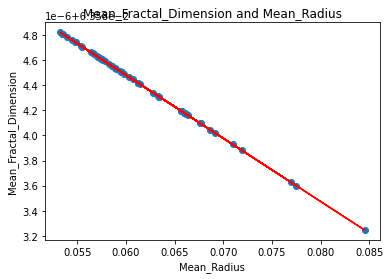

In [588]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Mean_Fractal_Dimension']).reshape(-1,1)
y_trainArray = np.array(y_train['Mean_Fractal_Dimension']).reshape(-1,1)
X_trainArray = np.array(X_train['Mean_Radius']).reshape(-1,1)
X_testArray = np.array(X_test['Mean_Radius']).reshape(-1,1)
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Mean_Radius")
plt.ylabel("Mean_Fractal_Dimension")
plt.title('Mean_Fractal_Dimension and Mean_Radius')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))
y_test.shape


I will demonstrate with some predictions below that the values are negatively skewed.  We will see that whenever we pass in a high fractal dimension the value will be lower and vice versa.  We can also see there is a low mean square error and a negative coefficient.  Since our coefficient is negative we will see that negative values will produce higher values for our dependent variable where as higher values will produce low values for our dependent variable

In [589]:
# As we can see not too much of a difference between the values here
print('this value will be low: ', regression_model.predict([[0.5]]))
print('this value will be high: ', regression_model.predict([[0.1]]))

# just to make our example clearer let's use ridiculously inflated values  
print('let\'s make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another')
print('this value will be low: ', regression_model.predict([[100]]))
# I use a negative value here to demonstrate the radius the higher the mean fractal dimension
print('this value will be high: ', regression_model.predict([[-100]]))


this value will be low:  [[0.06356235]]
this value will be high:  [[0.06358247]]
let's make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another
this value will be low:  [[0.05855859]]
this value will be high:  [[0.0686164]]


As we can see above that whenever I make the value of the mean fractal dimension higher then the value of our dependent variable will decrease, whenever I make it lower it will increase.  We can also see that the values don't have too much of an effect on each other this is because the negative correlation is around ~ -0.29

# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.7107474717749305e-05
Coefficient:  [[0.00829276]]
Intercept:  [0.01073952]


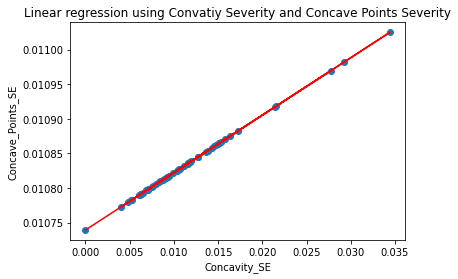

In [590]:
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Concave_Points_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Concave_Points_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Concavity_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')

We can see here there is a positive coefficient which is the amount we expect the value to increase by when making a prediction, we can also see that there is a low mean squared error value this indicates the performance of the model and the distance away the points are from our line

Below we see the second models features have on one another, we can clearly see that the data has a positive correlation from our graph but let's show some concrete examples and perform some predictions using it.

In [591]:
print('this value will be high: ', regression_model.predict([[0.5]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to show how high the impact will be with grossly inflated / deflated values values

print('let\'s make our model predict some grossly inflated / deflated values to show severity of impact')
print('this value will be high: ', regression_model.predict([[100]]))
print('this value will be low: ', regression_model.predict([[0.0000000001]]))


this value will be high:  [[0.0148859]]
this value will be low:  [[0.01156879]]
let's make our model predict some grossly inflated / deflated values to show severity of impact
this value will be high:  [[0.8400153]]
this value will be low:  [[0.01073952]]


Since the above values are highly correlated we see a greater rise and decrease in the predicted values when predicting than we did in the first linear regression model.  This is due to the fact that these two variables have a positive correlation of 0.776207, the features we used in our first model have a lower negative correlation which is why we don't see as much of an impact on them.  If they had a negative correlation of 0.776207 we would see the same rise and decrease in the first linear regression models predicted valules as well

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

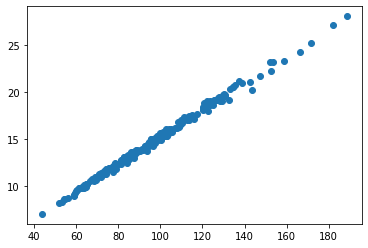

In [592]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


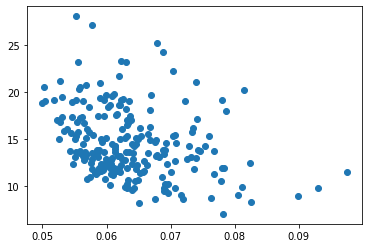

In [593]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


In [594]:
def predictValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [595]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train[['Diagnosis']])
print('Performance on X_test: ',knn.score(X_train,y_train['Diagnosis']))


Performance on X_test:  0.8237885462555066


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [596]:
# Make prediction on testSet
X_Predictions = knn.predict(X_test)
y_predictions = knn.predict(y_test)
X_trainPredictions = knn.predict(X_train)
y_trainPredictions = knn.predict(y_train)


In [597]:
y_train['Diagnosis']

561    0
370    1
480    0
396    0
410    0
      ..
359    0
528    0
566    1
372    1
524    0
Name: Diagnosis, Length: 227, dtype: int64

In [598]:
print('\nPredictions on test set\n')
predictValues(X_test['Diagnosis'].values,X_predictions)
print('\nPredictions on training set\n')
predictValues(X_train['Diagnosis'].values,X_trainPredictions)



Predictions on test set

Actual:  0  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  1
Actual:  0  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  1
Actual:  0  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  

In [599]:
print('\nPredictions on test set\n')
predictValues(y_test['Diagnosis'].values,y_predictions)
print('\nPredictions on training set\n')
predictValues(y_train['Diagnosis'].values,y_trainPredictions)




Predictions on test set

Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset, I chose to input a large number of features into this model as generally this algorithm performs better when fitted with more features, in Naive Bayes the weights of the features have no bearing on the output.  The model below is performing accurately but perhaps it is overfitting which is why I included two Naive Bayes Models in this notebook, the only difference being the number of features.  

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

You may also notice we are using a particular kind of Naive Bayes called Gaussian Naive Bayes for this model.  We chose to include this version of Naive Bayes due to it's ability to handle continuous data. The algorithm also has the advantage of speed and is frequently used in email spam classifiers.  The algorithm works by assuming that the continuous values across the features are normally distributed in a Gaussian fashion(think of a bell curve!)

In [600]:

from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Mean_Radius','Mean_Texture','Mean_Perimeter','Mean_Area','Mean_Smoothness','Mean_Compactness','Mean_Concavity','Mean_Concave_Points','Mean_Symmetry','Mean_Fractal_Dimension','Radius_SE','Texture_SE','Perimeter_SE','Area_SE','Smoothness_SE','Compactness_SE','Concavity_SE','Concave_Points_SE']],y_train['Diagnosis'])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Diagnosis']])
yDiagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])
XTrainDiagnosisPrediction = naive_bayes.predict(X_train[['Diagnosis']])
YTrainDiagnosisPrediction = naive_bayes.predict(y_train[['Diagnosis']])


In [601]:
predict(X_test['Diagnosis'].values,XDiagnosisPrediction)
predict(X_train['Diagnosis'].values,XTrainDiagnosisPrediction)



Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  

In [602]:
predict(y_test['Diagnosis'].values,yDiagnosisPrediction)
predict(y_train['Diagnosis'].values,YTrainDiagnosisPrediction)


Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  

# Second Naive Bayes Model - Underfitted
As we can see the model below has worse performance than the model above, you may be asking why we've included this model, the reason is that we wanted to demonstrate an underfitted model, this model has about 12 features where as the model above has 18

In [603]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Mean_Radius','Mean_Texture','Mean_Area','Mean_Concavity','Mean_Symmetry','Radius_SE','Perimeter_SE','Area_SE','Smoothness_SE','Compactness_SE','Concavity_SE']],y_train['Diagnosis'])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Diagnosis']])
yDiagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])

In [604]:
predict(X_test['Diagnosis'].values,XDiagnosisPrediction)
predict(X_train['Diagnosis'].values,XTrainDiagnosisPrediction)



Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  

In [605]:
predict(y_test['Diagnosis'].values,yDiagnosisPrediction)
predict(y_train['Diagnosis'].values,YTrainDiagnosisPrediction)


Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  

# Decision Trees

In [606]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [607]:
X_train = X_train.columns[1:32]

Training the first default tree model

In [608]:
features = list(X.columns[2:32])
features
clf = tree.DecisionTreeClassifier()

X['Diagnosis'] = X['Diagnosis'].replace({'M':1,'B':0})
y = y['Diagnosis'].replace({'M':1,'B':0})
# Train Decision Tree Classifer
X_train = X[features]
X_test = X_train
y_train = X['Diagnosis']
y_test = X['Diagnosis']

clf = clf.fit(X_train,y_train)
#clf = clf.fit (X,y)


In [609]:
print(y_test.shape,y_train.shape,X_train.shape,X_test.shape)

(284,) (284,) (284, 29) (284, 29)


Here we display the tree

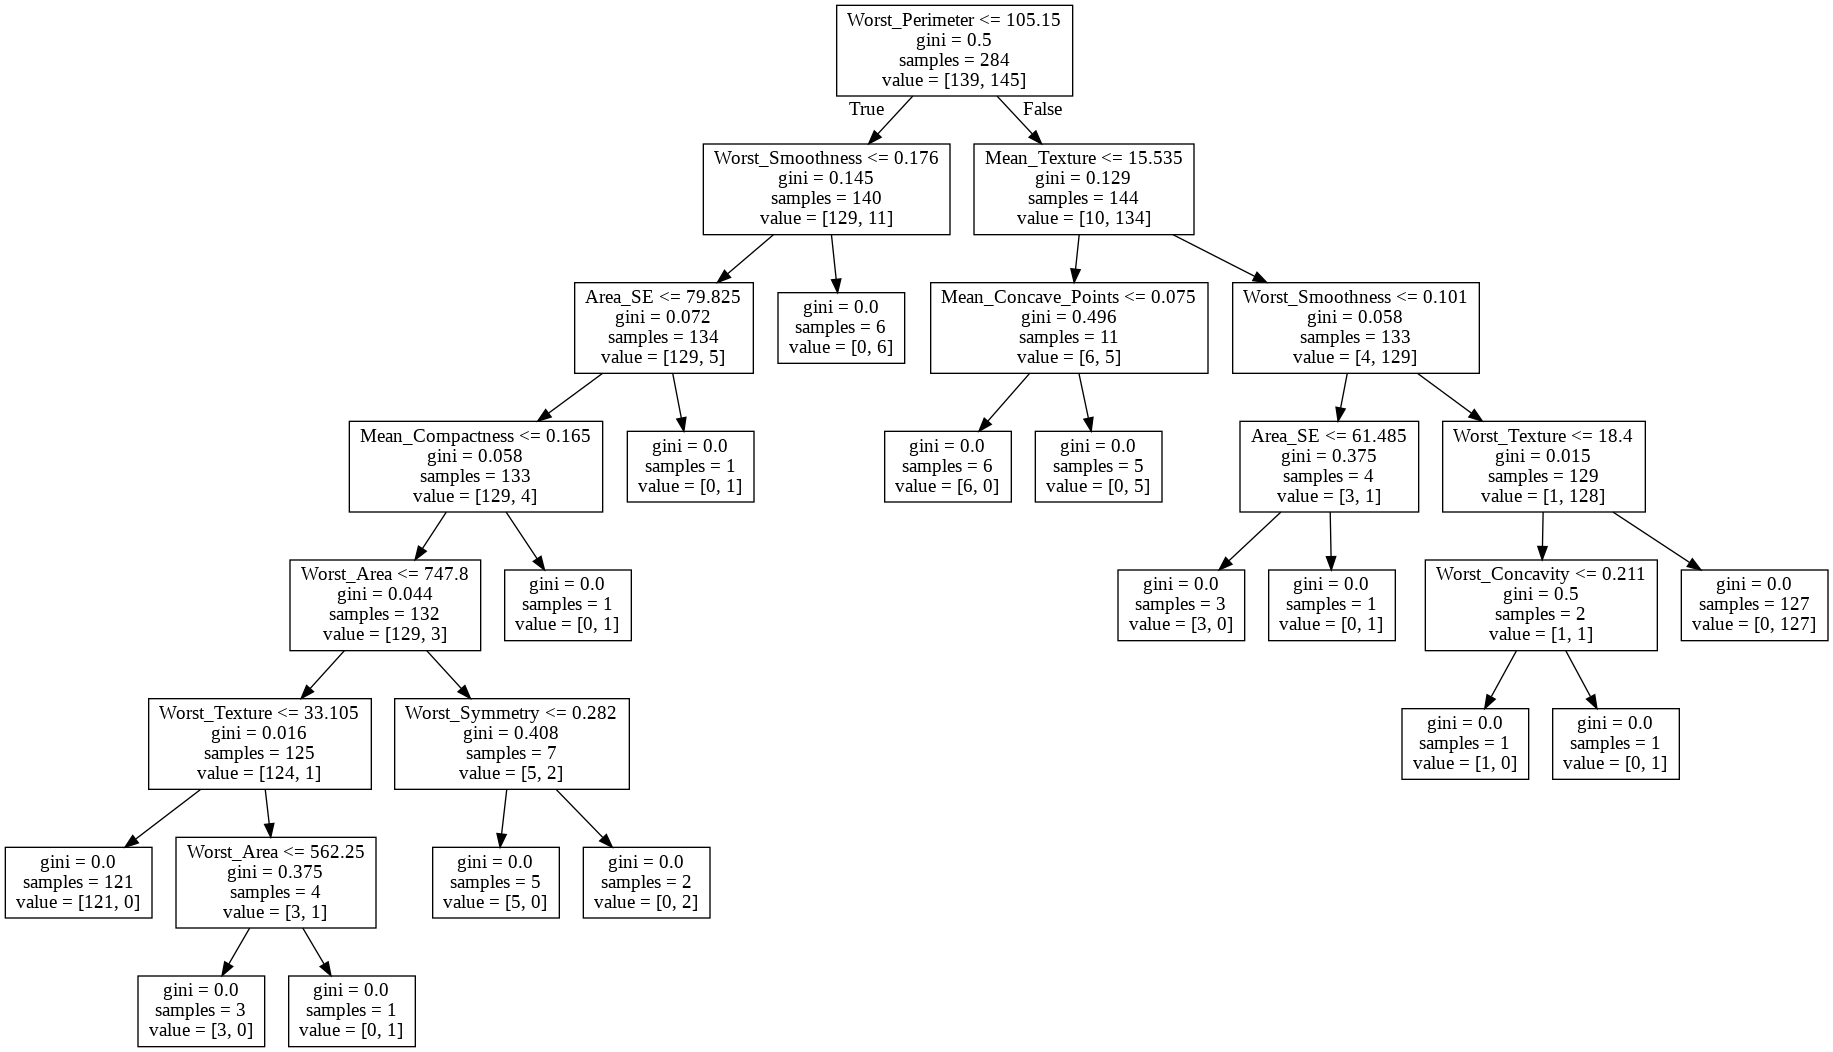

In [610]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The predicticton result for head data, this should really be fresh data not reusing training data



In [611]:
#When we use our training data above we should use our validation data here to test the predictions
print("Making predictions for the following 5 patients:")
print(X_test)
print("The predictions are")
print(clf.predict(X_test))

Making predictions for the following 5 patients:
     Mean_Texture  Mean_Perimeter  ...  Worst_Symmetry  Worst_Fractal_Dimension
0           10.38          122.80  ...          0.4601                  0.11890
1           17.77          132.90  ...          0.2750                  0.08902
2           21.25          130.00  ...          0.3613                  0.08758
3           20.38           77.58  ...          0.6638                  0.17300
4           14.34          135.10  ...          0.2364                  0.07678
..            ...             ...  ...             ...                      ...
279         15.18           88.99  ...          0.2955                  0.06912
280         26.60          126.20  ...          0.3258                  0.09720
281         14.02           74.24  ...          0.3101                  0.06688
282         18.18          127.20  ...          0.3590                  0.07787
283         18.77          108.80  ...          0.2770                 

Desicion tree test results



In [612]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1]
Accuracy: 1.0


Random forest

In [613]:

from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=10)
rfclf = rfclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1]
Accuracy: 0.9964788732394366


So we can see that the Random forrest is more accurate

We also explored the alternative to the decision tree using entropy criterion rather than the default gini



In [614]:

entclf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
entclf = entclf.fit(X_train,y_train)

Display the entropy tree



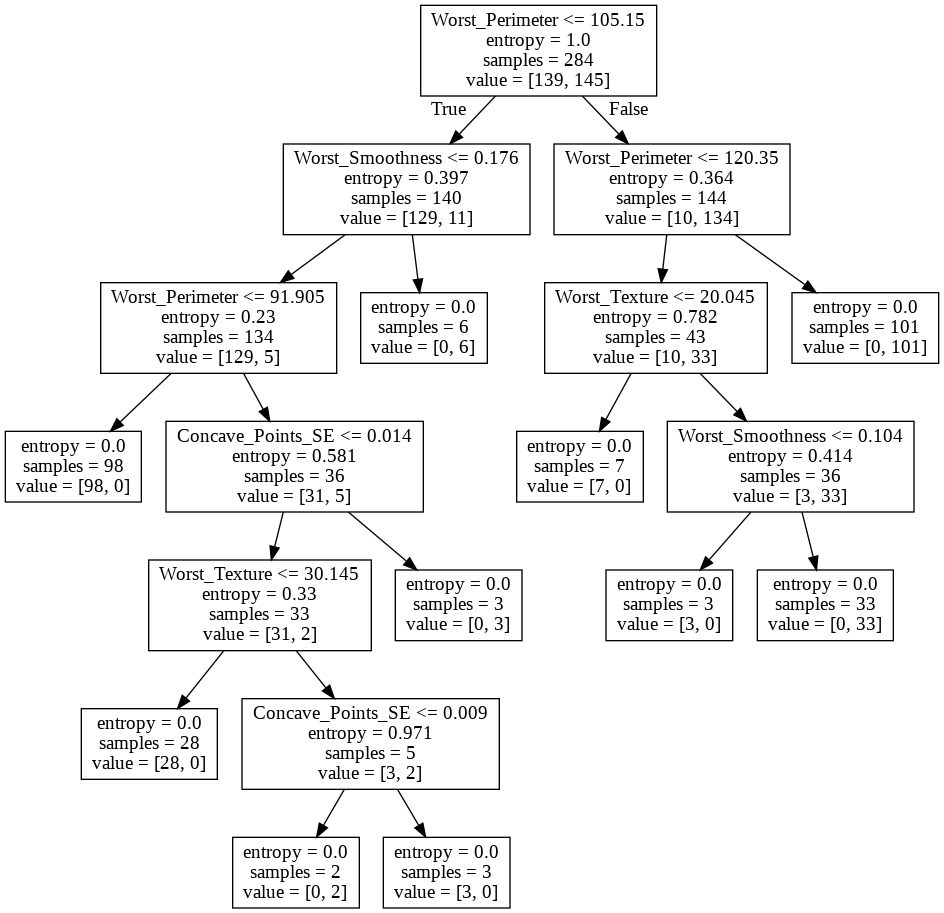

In [615]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(entclf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

entropy tree results

In [616]:

#Predict the response for test dataset
y_pred = entclf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1]
Accuracy: 1.0


Random Entropy forrest

In [617]:

rfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)
rfentclf = rfentclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfentclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1]
Accuracy: 1.0


testing via crossvalidation



In [618]:
from sklearn.model_selection import cross_val_score
np.random.seed(1)
scores = cross_val_score(clf, X, y_test)
print('gini tree accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfclf, X, y)
print('gini random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(entclf, X, y)
print('entropy accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfentclf, X, y)
print('entropy random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))


gini tree accuracy = 1.0 +/- 0.0
gini random forest accuracy = 0.7394736842105262 +/- 0.04865061271530542
entropy accuracy = 0.637280701754386 +/- 0.039706913325460634
entropy random forest accuracy = 0.7464912280701754 +/- 0.008039606482378692


Creating the Model For DecisionTreeRegression() (Problematic due to M/B classification rather than a series of numeric variables, may not be a viable model for this data)